In [1]:
from zipfile import ZipFile
file_name = 'drive/MyDrive/SDP_Datasets/malaria-cell.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Shrink images in the folder


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# IMAGE_SIZE + [3] - RGB images
# include_top = False removes last layer of VGG16 since VGG16 classifies 1000 category of images

80142336/80134624 [==============================] - 1s 0us/step


In [6]:
# Model is already trained, don't train existing weights again
for layer in vgg.layers:
    layer.trainable = False

In [7]:
# useful for getting number of classes of dataset
folders = glob('Dataset/Train/*')

In [8]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x) # our layers - you can add more if you want
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [16]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs = 30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
13/13 [==============================] - 6s 432ms/step - loss: 0.1661 - accuracy: 0.9399 - val_loss: 0.6255 - val_accuracy: 0.7164
Epoch 2/30
13/13 [==============================] - 6s 420ms/step - loss: 0.1779 - accuracy: 0.9327 - val_loss: 0.3574 - val_accuracy: 0.8134
Epoch 3/30
13/13 [==============================] - 6s 422ms/step - loss: 0.1494 - accuracy: 0.9447 - val_loss: 0.3095 - val_accuracy: 0.8433
Epoch 4/30
13/13 [==============================] - 6s 422ms/step - loss: 0.1863 - accuracy: 0.9231 - val_loss: 0.6058 - val_accuracy: 0.7537
Epoch 5/30
13/13 [==============================] - 6s 439ms/step - loss: 0.1790 - accuracy: 0.9327 - val_loss: 0.4238 - val_accuracy: 0.7761
Epoch 6/30
13/13 [==============================] - 6s 424ms/step - loss: 0.1383 - accuracy: 0.9399 - val_loss: 0.4544 - val_accuracy: 0.7612
Epoch 7/30
13/13 [==============================] - 6s 425ms/step - loss: 0.1081 - accuracy: 0.9712 - val_loss: 0.2281 - val_accuracy: 0.8955
Epoch 

In [17]:
from keras.models import load_model
model.save('malaria-cell-model.h5')

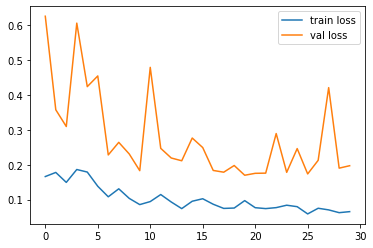

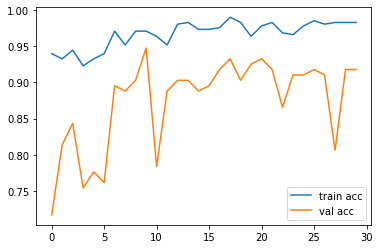

<Figure size 432x288 with 0 Axes>

In [18]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')